In [1]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot
from matplotlib.ticker import FormatStrFormatter
from pyne import serpent
from pyne import nucname
from pyne import data
import re
import itertools
import os

def elem_aaa(iso):
    m = re.match(r"(?P<letters>[a-zA-Z]+)(?P<the_rest>.+)$", iso)
    return [m.group('letters'), m.group('the_rest')]

def merge(a,b):
    final = np.zeros (len(a)+len(b))
    for i in range(len(a)):
        final[2*i]   = a[i]
        final[2*i+1] = b[i]
    return final

/home/andrei2/anaconda3/envs/py35/lib/python3.5/site-packages/pyne/serpent.py:11: QAWarning: pyne.serpent is not yet QA compliant.
  warn(__name__ + " is not yet QA compliant.", QAWarning)
/home/andrei2/anaconda3/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)


# Load following

In [19]:
sss_output_1 = '../../load-following/small_eps/eol/boc/tap.serpent'
sss_output_2 = '../../load-following/small_eps/eol/eoc_-0d/tap.serpent'
# sss_output_3 = '../../load-following/small_eps/eol/eoc_-3d/tap.serpent'
# sss_output_2 = '../../load-following/small_eps/eol/eoc-peak-load/tap.serpent'
sss_output_3 = '../../load-following/small_eps/eol/moc/tap.serpent'


dep_boc = serpent.parse_dep(os.path.join(os.getcwd(), 
                            sss_output_1+'_dep.m'), make_mats=False)
res_boc = serpent.parse_res(os.path.join(os.getcwd(), 
                            sss_output_1+'_res.m'))

dep_eoc = serpent.parse_dep(os.path.join(os.getcwd(), 
                            sss_output_2+'_dep.m'), make_mats=False)
res_eoc = serpent.parse_res(os.path.join(os.getcwd(), 
                            sss_output_2+'_res.m'))

dep_eoc2 = serpent.parse_dep(os.path.join(os.getcwd(), 
                            sss_output_3+'_dep.m'), make_mats=False)
res_eoc2 = serpent.parse_res(os.path.join(os.getcwd(), 
                            sss_output_3+'_res.m'))

t_indx_shutdown = 0

keff_boc = res_boc['IMP_KEFF'][:, 0]         # K-eff parsing from dictionary
keff_err_boc = res_boc['IMP_KEFF'][:, 1]         # K-eff standart deviation
keff_eoc_3 = res_eoc['IMP_KEFF'][:, 0]         # K-eff parsing from dictionary
keff_err_eoc_3 = res_eoc['IMP_KEFF'][:, 1]         # K-eff standart deviation
keff_eoc_30 = res_eoc2['IMP_KEFF'][:, 0]         # K-eff parsing from dictionary
keff_err_eoc_30 = res_eoc2['IMP_KEFF'][:, 1]         # K-eff standart deviation



days_tap = np.around(dep_boc['DAYS']*24.0, decimals=0)
mdens_tap = dep_boc['MAT_fuel_MDENS']        # mass density for each isotope in material 'fuel'
adens_tap = dep_boc['MAT_fuel_ADENS']
names_tap = dep_boc['NAMES'][0].split()                      # Names of isotopes parsed from *_dep.m file
tot_pow_b = res_boc['TOT_POWER'][:,0]
tot_pow_e = res_boc['TOT_POWER'][:,2]
tot_pow_err = res_boc['TOT_POWER'][:,1]

pow_level = 100*tot_pow_b[:-1]/max(tot_pow_b[:-1])
t_c = days_tap[:-1]+0.5*(days_tap[1:]-days_tap[:-1])
#tot_pow_b=np.insert(tot_pow_b,7,tot_pow_b[6])
#simp_power_load = np.concatenate( (100*np.ones(21),np.zeros(40),100*np.ones(31)) )
print(len(pow_level), len(t_c))

21 21


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21.]


<IPython.core.display.Javascript object>


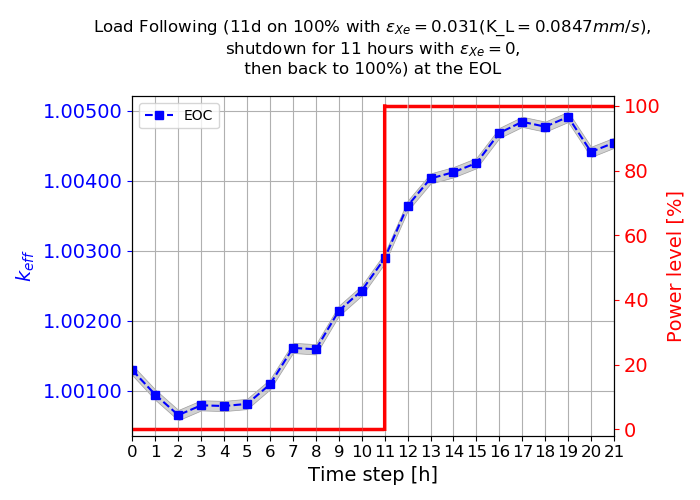

In [20]:
print(np.around(dep_eoc['DAYS']*24.0, decimals=2))
fig_keff = matplotlib.pyplot.figure(8, figsize=(7,5))
title = 'Load Following (11d on 100% with $\\epsilon_{Xe}=0.031 ($K_L$=0.0847mm/s)$, \nshutdown for 11 hours with $\\epsilon_{Xe}=0$, \n then back to 100%) at the EOL \n'
ax1 = fig_keff.add_subplot(111)
ax1.grid(True)
#ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#ax1.plot(days_lf, keff_2, 'o-', color='g', label='PWR')
#ax1.fill_between(days_lf, keff_2-keff_error2, keff_2+keff_error2,alpha=0.7, 
#                edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.5)

#ax1.plot(days_tap, keff_boc, 'o-', color='blue', label='BOC')
ax1.plot(days_tap, keff_eoc_3, 's--', color='blue', label='EOC')
#ax1.plot(days_tap, keff_eoc_30, '*--', color='blue', label='MOC')

#ax1.fill_between(days_tap, keff_boc-keff_err_boc, keff_boc+keff_err_boc,alpha=0.7, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.5)
ax1.fill_between(np.around(dep_eoc['DAYS']*24.0, decimals=2), keff_eoc_3-keff_err_eoc_3, keff_eoc_3+keff_err_eoc_3,alpha=0.7, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.5)
#ax1.fill_between(days_tap, keff_eoc_30-keff_err_eoc_30, keff_eoc_30+keff_err_eoc_30,alpha=0.7, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.5)

ax1.legend(loc=2)
ax1.set_ylabel(r'$k_{eff}$', color='b', fontsize=14)
ax1.set_xlabel('Time step [h]', fontsize=14)
ax1.set_title(title)
#ax1.set_ylim([1.0064,1.0093])
#ax1.set_ylim(1.104, 1.124)
#ax1.set_xlim([0,max(days_tap)])
ax1.set_xlim(0,21)
ax1.tick_params('x', labelsize=12)
ax1.set_xticks(days_tap)
ax1.tick_params('y', colors='b', labelsize=14)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.5f'))

ax2=ax1.twinx()
ax2.bar(days_tap[:-1], 0.0, bottom=pow_level,color='#f77777', alpha=1, align='edge', width=0.99, ls="-",
        edgecolor='#fc0303', linewidth=2.5, fill=False)
ax2.plot([11,11.0001],[0, 100], c='red', alpha=1, linewidth=2.5)
ax2.set_ylim(-2,103)
ax2.set_ylabel('Power level [%]', color='r', fontsize=14)
ax2.tick_params('y', colors='r', labelsize=14)
fig_keff.tight_layout()
fig_keff.show()
#fig_keff.savefig('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/dissertation/figures/ch4/lf/keff_kl_100_eol_moc.png',bbox_inches='tight', dpi=700)

<IPython.core.display.Javascript object>


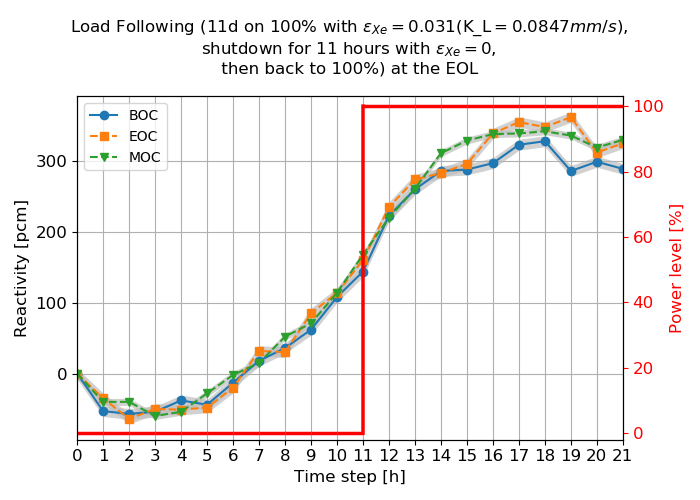

Maximum reactivity drop after shutdown -57.000000 pcm (BOC), t=2.000000 h
Maximum reactivity drop after shutdown -60.000000 pcm (MOC), t=3.000000 h
Maximum reactivity drop after shutdown -64.000000 pcm (EOC), t=2.000000 h


In [21]:
rho_boc = 1e+5*(keff_boc-keff_boc[t_indx_shutdown])
rho_eoc_3 = 1e+5*(keff_eoc_3-keff_eoc_3[t_indx_shutdown])
rho_eoc_30 = 1e+5*(keff_eoc_30-keff_eoc_30[t_indx_shutdown])

fig_rho = matplotlib.pyplot.figure(9, figsize=(7,5))
ax1 = fig_rho.add_subplot(111)
ax1.grid(True)
#ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.plot(days_tap, rho_boc, 'o-', label='BOC') #,fillstyle='none')
ax1.plot(days_tap, rho_eoc_3, 's--', label='EOC') #,fillstyle='none')
ax1.plot(days_tap, rho_eoc_30, 'v--', label='MOC') #,fillstyle='none')

ax1.fill_between(days_tap, rho_boc-1e5*keff_err_boc, rho_boc+1e5*keff_err_boc,
                alpha=0.7, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0)
ax1.fill_between(days_tap, rho_eoc_3-1e5*keff_err_eoc_3, rho_eoc_3+1e5*keff_err_eoc_3,
                alpha=0.7, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0)
ax1.fill_between(days_tap, rho_eoc_30-1e5*keff_err_eoc_30, rho_eoc_30+1e5*keff_err_eoc_30,
                alpha=0.7, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0)


ax1.legend(loc=2)
ax1.set_ylabel('Reactivity [pcm]',fontsize=12)
ax1.set_xlabel('Time step [h]',  fontsize=12)
ax1.tick_params('y', labelsize=12)
ax1.tick_params('x', labelsize=12)
ax1.set_xticks(days_tap)
ax1.set_title(title)
#ax.set_ylim([1,1.05])
ax1.set_xlim([0, 21])

ax2=ax1.twinx()
#ax2.plot(days_tap, 100*tot_pow_b/max(tot_pow_b), 'o-', color='r', markerfacecolor='None')
ax2.bar(days_tap[:-1], 0.0, bottom=pow_level,color='#f77777', alpha=1, align='edge', width=0.99, ls="-",
        edgecolor='#fc0303', linewidth=2.5, fill=False)
ax2.plot([11,11.0001],[0, 100], c='red', alpha=1, linewidth=2.5)

ax2.set_ylabel('Power level [%]', color='r', fontsize=12)
ax2.tick_params('y',  colors='r', labelsize=12)
ax2.set_ylim(-2,103)

fig_rho.tight_layout()
fig_rho.show()
#fig_rho.savefig('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/dissertation/figures/ch4/lf/rho_eol.png',bbox_inches='tight', dpi=700)
print('Maximum reactivity drop after shutdown %f pcm (BOC), t=%f h' %(np.amin(rho_boc), days_tap[np.where(rho_boc == np.amin(rho_boc))[0]]))
print('Maximum reactivity drop after shutdown %f pcm (MOC), t=%f h' %(np.amin(rho_eoc_30), days_tap[np.where(rho_eoc_30 == np.amin(rho_eoc_30))[0]]))
print('Maximum reactivity drop after shutdown %f pcm (EOC), t=%f h' %(np.amin(rho_eoc_3), days_tap[np.where(rho_eoc_3 == np.amin(rho_eoc_3))[0]]))

<IPython.core.display.Javascript object>


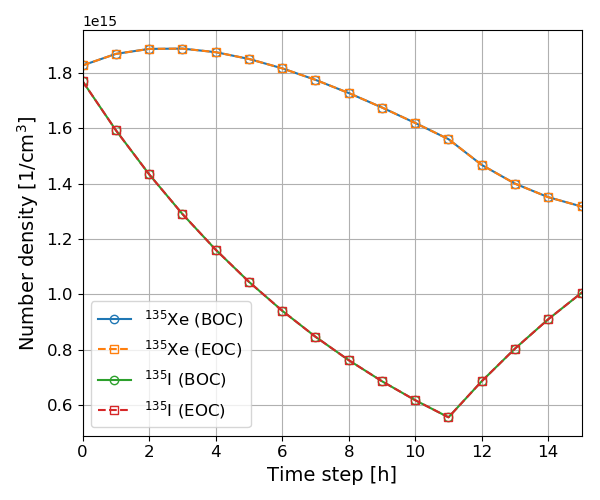

Xe135 concentration at t=0 1.827820e+15 1/cm3; I135 st t=0 1.770030e+15 1/cm3
I135/Xe135 ratio at the beginning of the transient 0.968383
Xe135 concentration peak at t=3.000000 hrs
[1.65706e-08 1.66060e-08 1.66412e-08 1.66762e-08 1.67109e-08 1.67452e-08
 1.67792e-08 1.68127e-08 1.68459e-08 1.68786e-08 1.69109e-08 1.69429e-08
 1.69520e-08 1.69608e-08 1.69695e-08 1.69782e-08 1.69868e-08 1.69954e-08
 1.70041e-08 1.70129e-08 1.70217e-08 1.70306e-08]


In [5]:
target_iso = ['Xe135', 'I135']
color_d = {'Xe135' : 'blue', 'I135': 'red', 'Te135': 'orange'}
style_d = {'Xe135' : '-', 'I135': '--', 'Te135': '+--'}
#style = itertools.cycle(('-', '-', '--', '-', '-', '-'))
# Initialize figure
fig_10 = matplotlib.pyplot.figure(11, figsize=(6,5))
ax = fig_10.add_subplot(111)
ax.grid(True)

for i in target_iso:
    el_aaa = elem_aaa(i)
    iso_name = "$^{"+str(el_aaa[-1])+"}$"+str(el_aaa[0])
    ax.plot(days_tap, 1e+24*adens_tap[names_tap.index(i),:], 'o-',fillstyle='none', label=iso_name+' (BOC)')
    ax.plot(days_tap, 1e+24*dep_boc['MAT_fuel_ADENS'][names_tap.index(i),:], 's--', fillstyle='none', label=iso_name+' (EOC)')
    
ax.legend(loc=0, fontsize=12)
#ax.set_ylabel('Mass [t]')
#ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.tick_params('y', labelsize=12)
ax.tick_params('x', labelsize=12)
ax.set_ylabel(r'Number density [1/cm$^3$]', fontsize=14)
#ax.set_ylabel(r'Mass density [g/cm$^3$]')
ax.set_xlabel('Time step [h]', fontsize=14)
#ax.set_title('Isotope mass density in material FUEL')
ax.set_xlim([0.0,15.0])
#ax.set_ylim([1.3e15,2.4e16])
# Zoom peak
#ax.set_xlim([10, 10.3])
#ax.set_ylim([0.82e15, 0.83e15])
#ax.set_ylim([1e-20, 1e16])

fig_10.tight_layout()
fig_10.show()
#fig_10.savefig('/home/andrei2/Desktop/git/publications/2019-rykhl-xenon-ans/figures/tap_vs_pwr_xe_i_density.png',bbox_inches='tight', dpi=900)

print('Xe135 concentration at t=0 %e 1/cm3; I135 st t=0 %e 1/cm3'
         %(1e24*adens_tap[names_tap.index('Xe135'),t_indx_shutdown], 1e24*adens_tap[names_tap.index('I135'),t_indx_shutdown]))
print('I135/Xe135 ratio at the beginning of the transient %f' 
        %(adens_tap[names_tap.index('I135'),0]/adens_tap[names_tap.index('Xe135'),t_indx_shutdown]))
print('Xe135 concentration peak at t=%f hrs' %(days_tap[int(np.argmax(adens_tap[names_tap.index('Xe135'),:-4]))]))
print(adens_tap[names_tap.index('Sm149'),:])
#print(days_tap[:-17])

[1.e-10 1.e-10 1.e-10 1.e-10 1.e-10]
[    0.  3600.  7200. 10800. 14400. 18000. 21600. 25200. 28800. 32400.
 36000. 39600. 43200. 46800. 50400. 54000. 57600. 61200.]


<IPython.core.display.Javascript object>


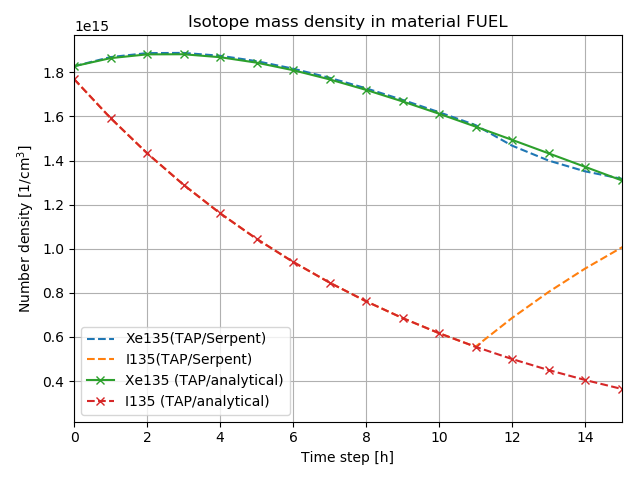

Xe135 peak concentration 1.882284e+15 1/cm3 at t=3.000000 h
Or 3.000000 hr after shutdown


In [6]:
print(tot_pow_b[:5])
#print(adens_tap[names_tap.index('Xe135')])
#print(adens_tap[names_tap.index('Xe135'),14])
N_xe_0 = 1e+24*adens_tap[names_tap.index('Xe135'), t_indx_shutdown]

N_i_0 = 1e+24*adens_tap[names_tap.index('I135'), t_indx_shutdown]

t = days_tap[4:]
t = (t - days_tap[4])*3600 # to sec
print(t)

lamb_xe = data.decay_const('Xe-135')
lamb_i = data.decay_const('I-135')

#for i in range(1,len(N_xe)-1):
#    N_xe[i+1] = (N_xe[i]- N_i_d[i+1])* np.exp(-data.decay_const('Xe-135')*(t[i+1]-t[i])) 
N_xe = N_xe_0*np.exp(-lamb_xe*t) + \
    (N_i_0*lamb_i)/(lamb_i-lamb_xe)*(np.exp(-lamb_xe*t) - np.exp(-lamb_i*t))
N_i = N_i_0*np.exp(-lamb_i*t)

# Initialize figure
fig_11 = matplotlib.pyplot.figure(12) #, figsize=(10,6))
ax = fig_11.add_subplot(111)
ax.grid(True)
#ax.set_ylim(0,1.01)
for i in ['Xe135','I135']:#, names.index('U233'), names.index('U235')]:
    #ax.plot(days_lf, 1e+24*adens[names.index(i)], 'v--', label=i+'(PWR/Serpent)')
    ax.plot(days_tap, 1e+24*adens_tap[names_tap.index(i)], '--', label=i+'(TAP/Serpent)')
ax.plot(t/3600+days_tap[t_indx_shutdown], N_xe, 'x-', label='Xe135 (TAP/analytical)')
ax.plot(t/3600+days_tap[t_indx_shutdown], N_i, 'x--', label='I135 (TAP/analytical)')
ax.legend(loc=0)
#ax.set_ylabel('Mass [t]')
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.set_ylabel(r'Number density [1/cm$^3$]')
#ax.set_ylabel(r'Mass density [g/cm$^3$]')
ax.set_xlabel('Time step [h]')
ax.set_title('Isotope mass density in material FUEL')
ax.set_xlim([0,15])

#zoom peak Xe135
#ax.set_xlim([9, 10])
#ax.set_ylim([8.0e+14, 8.74e+14])
fig_11.tight_layout()
fig_11.show()
#fig_11.savefig('6_tap_vs_analytical_xe_i_density.png',bbox_inches='tight')
print('Xe135 peak concentration %e 1/cm3 at t=%f h' %(np.amax(N_xe),
                                                      t[int(np.argmax(N_xe))]/3600+days_tap[t_indx_shutdown]))
print('Or %f hr after shutdown' %(t[int(np.argmax(N_xe))]/3600))

In [7]:
nom = lamb_xe*(lamb_i*(N_xe_0+N_i_0)-lamb_xe*N_xe_0)
den = lamb_i**2 * N_i_0
t_peak = np.log(nom/den) / (lamb_xe-lamb_i)

print('Analytical solution for the Xe-135 peak %f s, %f h' %(t_peak, t_peak/3600))

print('\nSecond method')
t = np.arange(0, 5*24*3600, 0.1)
N_xe = N_xe_0*np.exp(-lamb_xe*t) + \
    (N_i_0*lamb_i)/(lamb_i-lamb_xe)*(np.exp(-lamb_xe*t) - np.exp(-lamb_i*t))
print('Xe135 peak concentration %e 1/cm3 at t=%f h' %(np.amax(N_xe),
                                                      np.argmax(N_xe)/36000))

Analytical solution for the Xe-135 peak 9099.650956 s, 2.527681 h

Second method
Xe135 peak concentration 1.883916e+15 1/cm3 at t=2.527694 h
